In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/Colab Notebooks/Dataset/fetalecg_dataset.txt"

'/content/drive/My Drive/Colab Notebooks/Dataset/fetalecg_dataset.txt'


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import Data

In [6]:
filename = '/content/drive/My Drive/Colab Notebooks/Dataset/fetalecg_dataset.txt'
data = np.loadtxt(filename, delimiter='\t', dtype=float)
print(data)

[[0.0000e+00 2.8800e+01]
 [1.0000e-03 2.6700e+01]
 [2.0000e-03 2.4800e+01]
 ...
 [9.9970e+00 9.1401e+01]
 [9.9980e+00 9.1301e+01]
 [9.9990e+00 8.6001e+01]]


In [7]:
df = pd.DataFrame(data, columns = ['Time', 'Voltage'])
df

,Time,Voltage
0,0.000,28.800
1,0.001,26.700
2,0.002,24.800
3,0.003,23.800
4,0.004,23.600
...,...,...
9995,9.995,75.901
9996,9.996,85.901
9997,9.997,91.401
9998,9.998,91.301


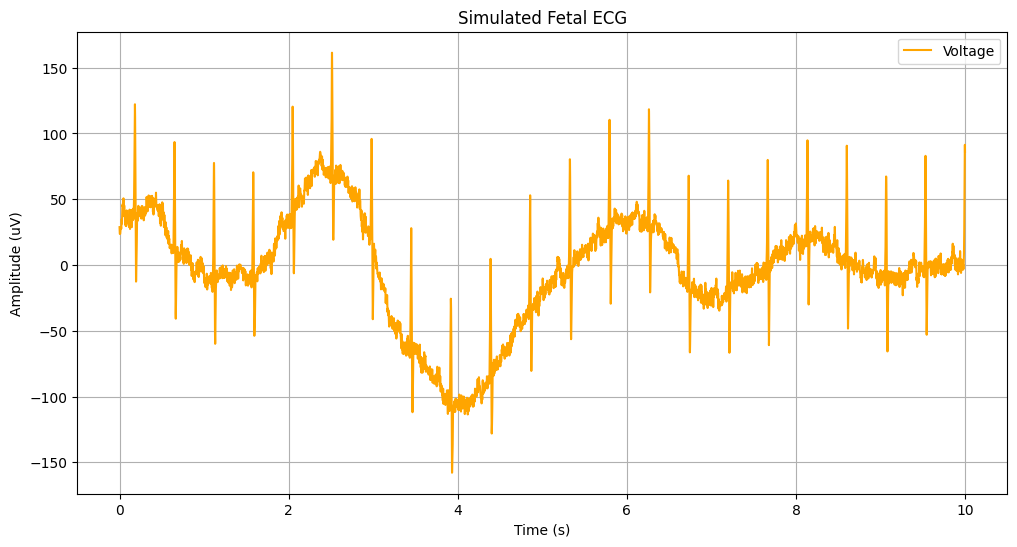

In [8]:
df.plot(x='Time', y='Voltage', figsize=(12, 6), color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('Simulated Fetal ECG')
plt.grid(True)
plt.show()

In [9]:
#Input x and y values
x = np.array(df['Time'])
y = np.array(df['Voltage'])
n = len(x)
o = int(input('Masukkan orde: '))

a = np.zeros((o+1, o+1))
b = np.zeros(o+1)
s = np.zeros(o+1)

#Calculate matrix A and vector B
for i in range(1, o+2):
  #Create A Matrix Coeff
  for j in range(1, i+1):
    k = i + j - 2
    sum = 0
    for l in range(0, n):
      sum = sum + x[l] ** k
      a[i-1, j-1] = sum
      a[j-1, i-1] = sum

  #Create b vector
  sum = 0
  for l in range(0, n):
    sum = sum + y[l] *x[l] ** (i-1)
  b[i-1] = sum

#Elimination
for k in range(o):
  for i in range(k+1, o+1):
    fctr = a[i,k] / a[k,k]
    for j in range(k, o+1):
      a[i, j] = a[i, j] - fctr*a[k, j]
    b[i] -= fctr*b[k]

#Back-substitution
s[o] = b[o] / a[o,o]
for i in range(o-1, -1, -1):
  sum = b[i]
  for j in range(i+1, o+1):
    sum = sum - a[i,j]*s[j]
  s[i] = sum / a[i, i]

#Calculate r2
#Calculating St and Sr
ym = b[0] / n
st = 0
for i in range(0,n):
  st = st + (y[i]-ym)**2

sr = 0
for i in range(0,n):
  sum = y[i]
  for j in range(0, o+1):
    sum = sum - s[j] * x[i]**(j)
  sr = sr + sum**2
r2 = (st-sr)/st

print('The polynomial: ')
print('f(x) = \t %f'%s[0])
for i in range(1, o+1):
  print('\t %+f x^%d' %(s[i],i))
print('r2 = %f' %(r2))

Masukkan orde: 16
The polynomial: 
f(x) = 	 35.133023
	 +9.322045 x^1
	 +267.909346 x^2
	 -1034.882387 x^3
	 +1214.235077 x^4
	 -664.204506 x^5
	 +188.742545 x^6
	 -25.801949 x^7
	 +0.479905 x^8
	 +0.288404 x^9
	 -0.020180 x^10
	 -0.002318 x^11
	 +0.000229 x^12
	 +0.000026 x^13
	 -0.000005 x^14
	 +0.000000 x^15
	 -0.000000 x^16
r2 = 0.866541


Plot Polynomial Regression

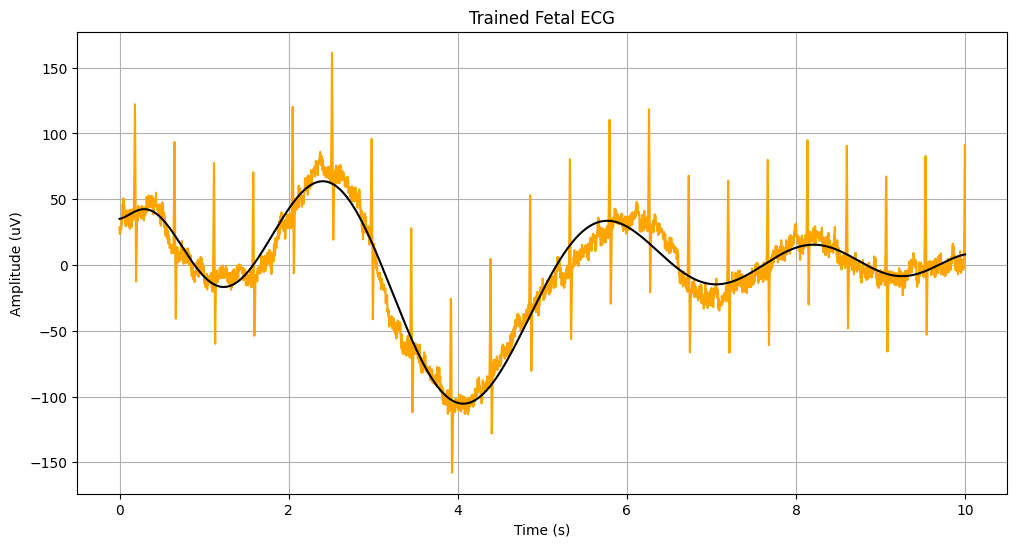

In [10]:
x = np.array(df['Time'])
y = np.array(df['Voltage'])

plt.figure(figsize=(12, 6))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('Trained Fetal ECG')
plt.grid(True)
plt.plot(x, y, color='orange')

r = 0
for i in range(o+1):
    r += s[i]*(x**i)
plt.plot(x, r, color='black') 
#plt.plot(x, y-r, color='pink') 
